In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("preprocessing_dataset.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        10 non-null     object 
 1   Age         9 non-null      float64
 2   Gender      9 non-null      object 
 3   Salary      9 non-null      float64
 4   Department  10 non-null     object 
dtypes: float64(2), object(3)
memory usage: 532.0+ bytes


In [4]:
df.isnull().sum()

Name          0
Age           1
Gender        1
Salary        1
Department    0
dtype: int64


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


<Axes: >

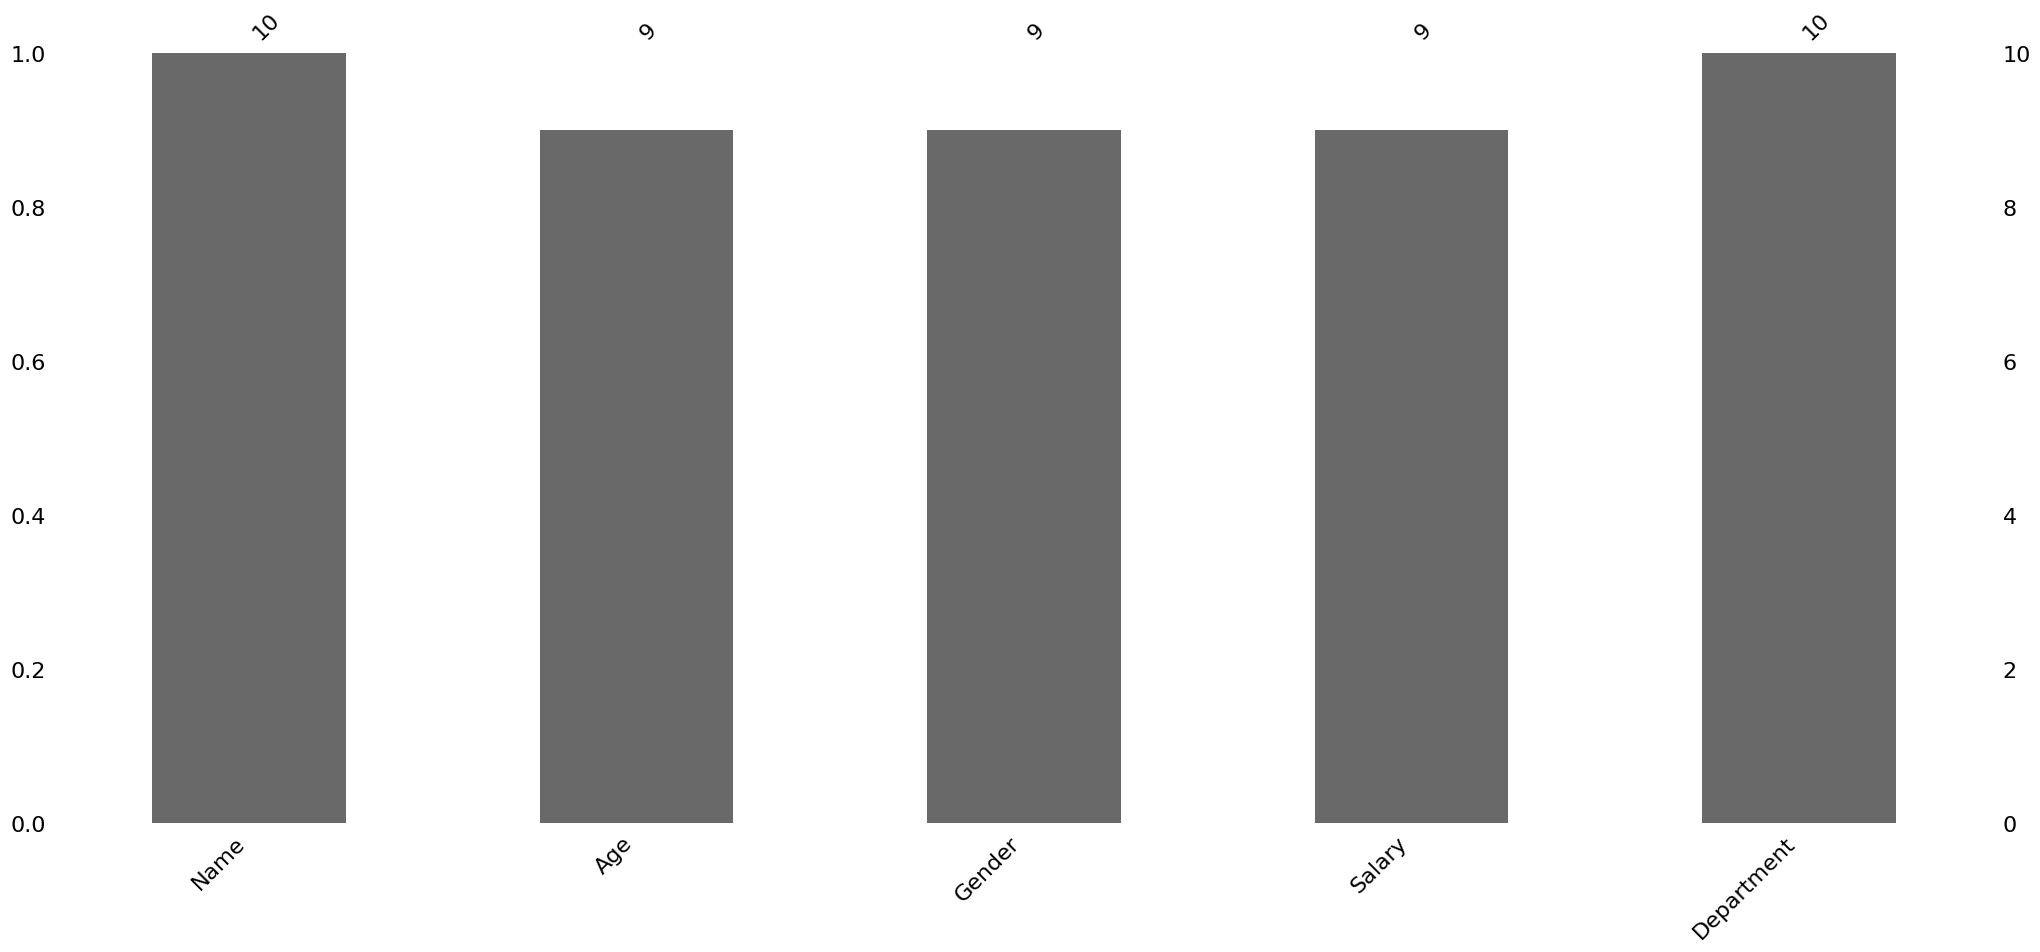

In [5]:

!pip install missingno
import missingno as msno
msno.bar(df )

<Axes: >

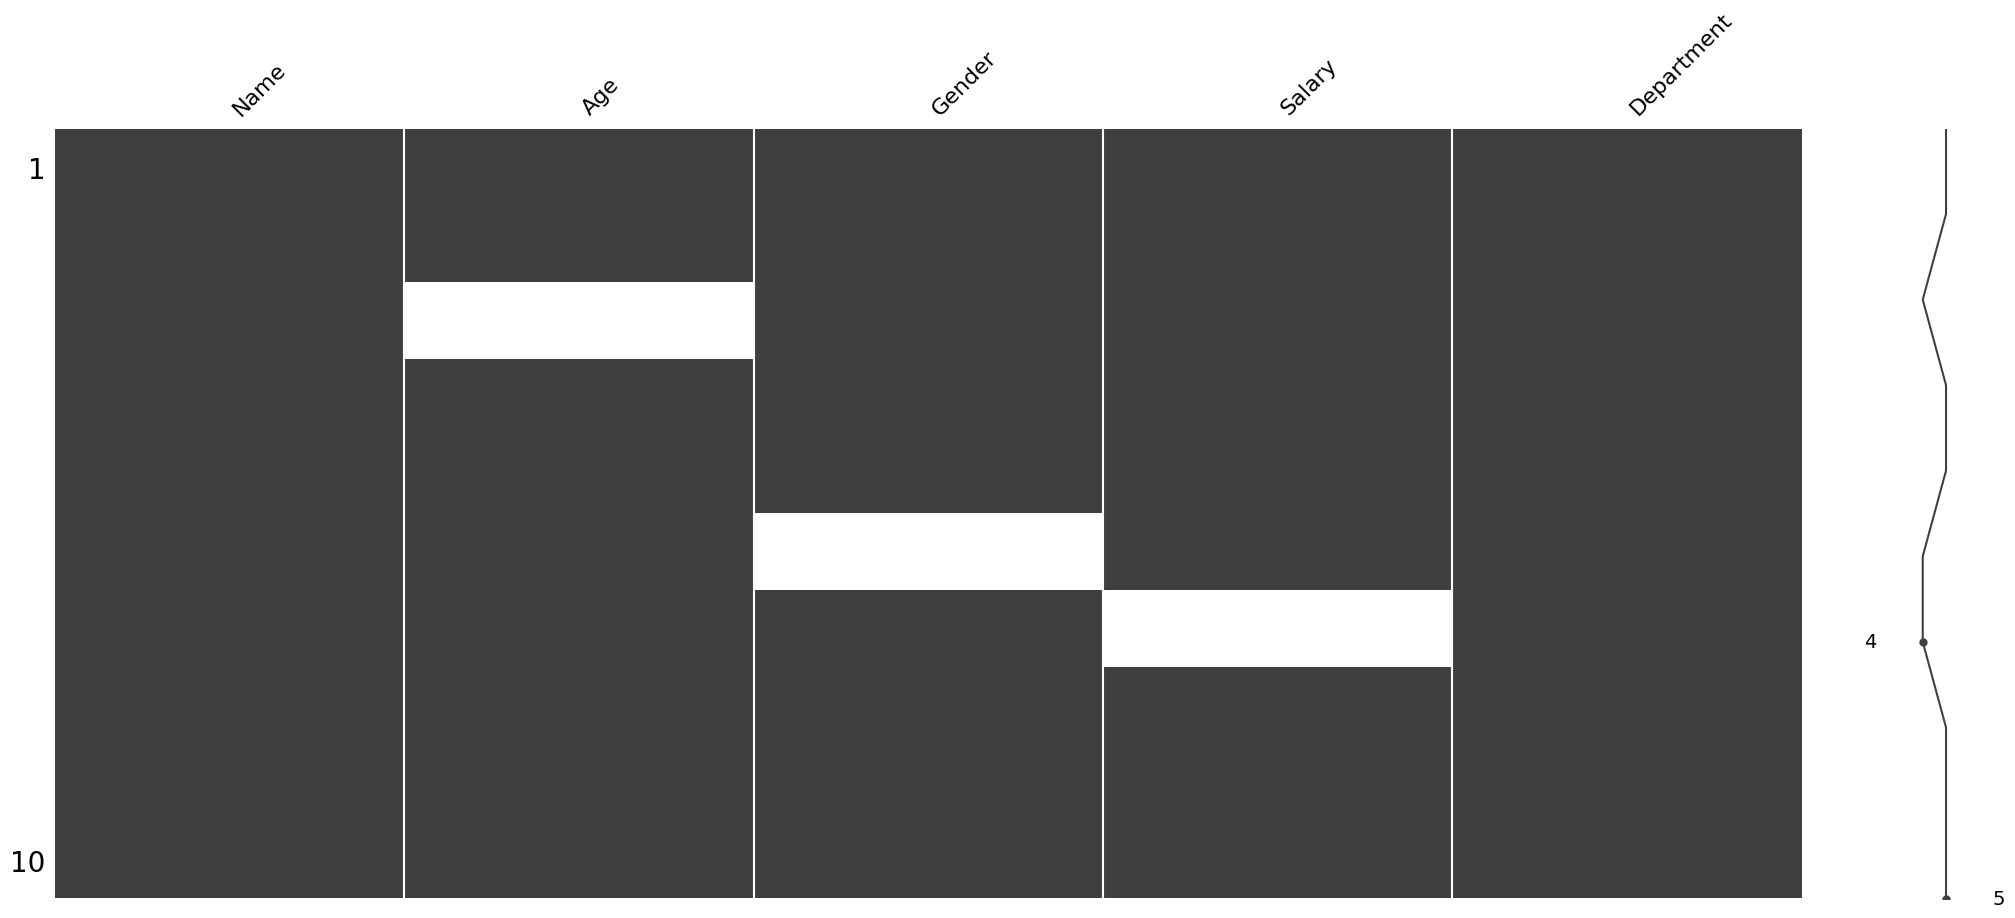

In [6]:
msno.matrix(df)

<Axes: >

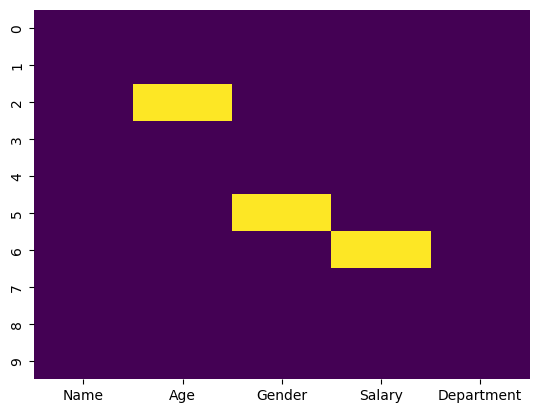

In [7]:
sns.heatmap(df.isnull(), cbar = False, cmap = 'viridis')

In [9]:
df['Age'].fillna(df['Age'].median(), inplace = True)
df['Salary'].fillna(df['Salary'].mean(), inplace = True)
df['Gender'].fillna(df['Gender'].mode()[0], inplace = True) # taking the first value of mode


C:\Users\snk\AppData\Local\Temp\ipykernel_15560\228061560.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace = True)
C:\Users\snk\AppData\Local\Temp\ipykernel_15560\228061560.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [10]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy = 'median')
# df[['Age']] = imp.fit_transform(df[['Age']])

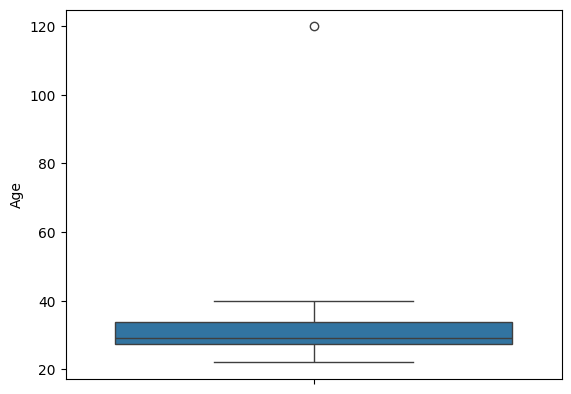

In [11]:
sns.boxplot(df['Age'])
plt.show()

In [12]:
q1 = df['Age'].quantile(0.25)
q3 = df['Age'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]
outliers


,Name,Age,Gender,Salary,Department
6,Grace,120.0,F,57777.777778,Finance


In [13]:
from  scipy.stats import zscore

z_scores = zscore(df['Age'])
df[np.abs(z_scores) > 2.5] # common rule : z > 3

,Name,Age,Gender,Salary,Department
6,Grace,120.0,F,57777.777778,Finance


<Axes: ylabel='Age'>

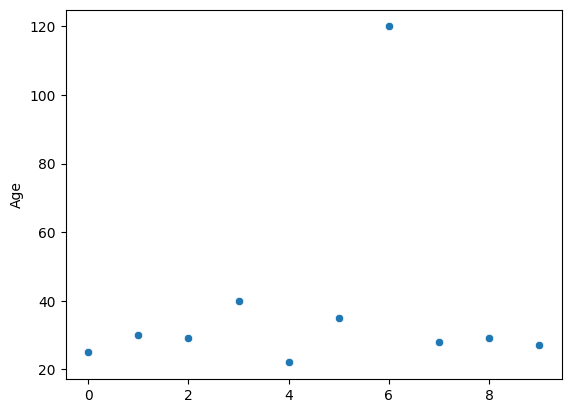

In [14]:
sns.scatterplot(df['Age'])

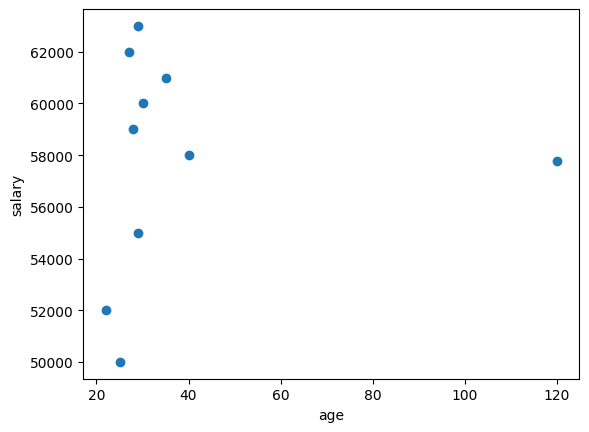

In [15]:
plt.scatter(df['Age'], df['Salary'])
plt.xlabel("age")
plt.ylabel("salary")
plt.show()

In [16]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination = 0.1) 
df['outlier'] = iso.fit_predict(df[['Age', 'Salary']])
df[df['outlier'] == -1] 

,Name,Age,Gender,Salary,Department,outlier
6,Grace,120.0,F,57777.777778,Finance,-1


In [20]:
df['Age'] = np.where(df['Age'] > 100, df['Age'].median(), df['Age'])

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender_encoded'] = le.fit_transform(df['Gender']) # creates the additional column but if we put gender the original col will be replced but usually will not thus beacuse we need origunal values



In [23]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
df['Age_norm'] = minmax.fit_transform(df[['Age']])
df['Salary_norm'] = minmax.fit_transform(df[['Salary']])